# **Отчёт о выполнении домашнего задания к лекции «Базовые понятия статистики»**
![](https://drive.google.com/uc?export=view&id=185xljuXFwrUYcKAr9GNCcwMb10NaPgb5)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%load_ext lab_black

<div class="alert alert-block alert-info">

## **Задание 1. Загрузка данных**

### Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery, age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
# загрузка данных
df_horse = pd.read_csv(
    "/home/sk27/learning/STPY-37/bcs/data/horse_data.csv",
    dtype={24: "object", 25: "object", 26: "object"},
    sep=",",
    na_values="?",
).apply(pd.to_numeric, errors="ignore")

### Описание используемых столбцов на русском языке:
- surgery: хирургическое вмешательство (1 - да, 2 - лечение без хирургического вмешательства);   
- age: возраст лошади, лет (1 - взрослая лошадь, 9 - молодая(< 6 месяцев));
- rectal_temperature: температура, ищмеренная в прямой кишке, градусов Цельсия;
- pulse: пульс, ударов в минуту;
- respiratory rate: частота дыхания, вдохов-выдохов в минуту;
- temperature of extremities: температрура каонечностей (1 - нормальные, 2 - горячие, 3 - прохладные, 4 - холодные);
- pain: субъективное суждение об уровне боли лошади (1 - возбуждена при отсутствии боли, 2 - подавленое состояние, 3 - периодическая легкая боль, 4 - периодическая сильная боль, 5 - непрерывная сильная боль);
- outcome: исход (1 - выжила, 2 - погибла, 3 - умершвлена)

In [ ]:
# список столбцов исходного dataframe с индексами для удобства дальнейшей работы
col = df_horse.columns
for index, name in enumerate(col):
    print(index, name)

0 surgery
1 age
2 hospital_number
3 rectal_temperature
4 pulse
5 respiratory_rate
6 temperature_extremities
7 peripheral_pulse
8 mucous_membranes
9 capillary_refill_time
10 pain
11 peristalsis
12 abdominal_distension
13 nasogastric_tube
14 nasogastric_reflux
15 nasogastric_reflux_PH
16 rectal_examination
17 abdomen
18 packed_cell_volume
19 total_protein
20 abdominocentesis_appearance
21 abdomcentesis_total_protein
22 outcome
23 surgical_lesion
24 lesion_type_0
25 lesion_type_1
26 lesion_type_2
27 cp_data


In [ ]:
# отбор необходимых столбцов
df_horse = df_horse[[col[0], col[1], col[3], col[4], col[5], col[6], col[10], col[22]]]

In [ ]:
df_horse

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery                  299 non-null    float64
 1   age                      300 non-null    int64  
 2   rectal_temperature       240 non-null    float64
 3   pulse                    276 non-null    float64
 4   respiratory_rate         242 non-null    float64
 5   temperature_extremities  244 non-null    float64
 6   pain                     245 non-null    float64
 7   outcome                  299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


### Исходя из физического смысла показателей во всех столбцах, помимо rectal_temperature, должны быть целочисленные значения. Однако наличие пустых значений и имеющиеся ограничения не позволяют это сделать прямо сейчас без ненужного усложнения.

<div class="alert alert-block alert-info">

## **Задание 2. Первичное изучение данных**

### Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

### 2.1. Базовые статистики

In [ ]:
# метод describe() позволяет получить только чать основных статистик, напишем свою функцию
def bs(df):
    """функция возвращает значения базовых статистик для всех столбцов заданного фрейма данных"""
    df_stat = pd.DataFrame()
    col = df.columns
    for column in col:
        row = {
            "column": column,
            "not_null": df[column].count(),
            "null_count": df[column].isna().count() - df[column].count(),
            "min": df[column].min(),
            "max": df[column].max(),
            "range": df[column].max() - df[column].min(),
            "mode": df[column].mode()[0],
            "mean": df[column].mean(),
            "median": df[column].median(),
            "std": df[column].std(),
            "var": df[column].var(),
            "25%": df[column].quantile(0.25),
            "75%": df[column].quantile(0.75),
            "IQR": df[column].quantile(0.75) - df[column].quantile(0.25),
        }
        df_stat = pd.concat([df_stat, pd.DataFrame([row])])
    return df_stat.reset_index(drop=True)

In [ ]:
bs(df_horse)

,column,not_null,null_count,min,max,range,mode,mean,median,std,var,25%,75%,IQR
0,surgery,299,1,1.0,2.0,1.0,1.0,1.397993,1.0,0.490305,0.240399,1.0,2.0,1.0
1,age,300,0,1.0,9.0,8.0,1.0,1.640000,1.0,2.173972,4.726154,1.0,1.0,0.0
2,rectal_temperature,240,60,35.4,40.8,5.4,38.0,38.167917,38.2,0.732289,0.536247,37.8,38.5,0.7
3,pulse,276,24,30.0,184.0,154.0,48.0,71.913043,64.0,28.630557,819.708775,48.0,88.0,40.0
4,respiratory_rate,242,58,8.0,96.0,88.0,20.0,30.417355,24.5,17.642231,311.248328,18.5,36.0,17.5
5,temperature_extremities,244,56,1.0,4.0,3.0,3.0,2.348361,3.0,1.045054,1.092137,1.0,3.0,2.0
6,pain,245,55,1.0,5.0,4.0,3.0,2.951020,3.0,1.307940,1.710706,2.0,4.0,2.0
7,outcome,299,1,1.0,3.0,2.0,1.0,1.551839,1.0,0.737187,0.543445,1.0,2.0,1.0


### 2.2. Оценка выбросов

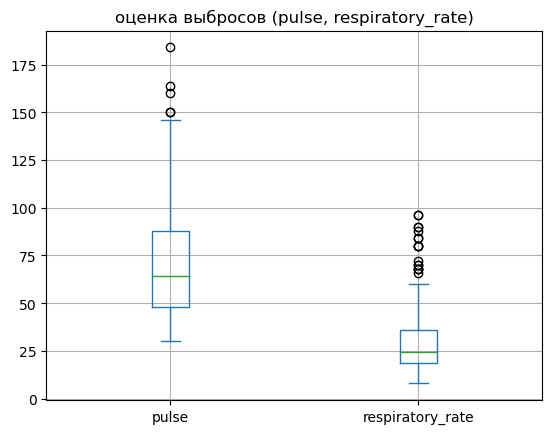

In [ ]:
df_horse[
    [
        "pulse",
        "respiratory_rate",
    ]
].plot(kind="box", title="оценка выбросов (pulse, respiratory_rate)", grid=True)

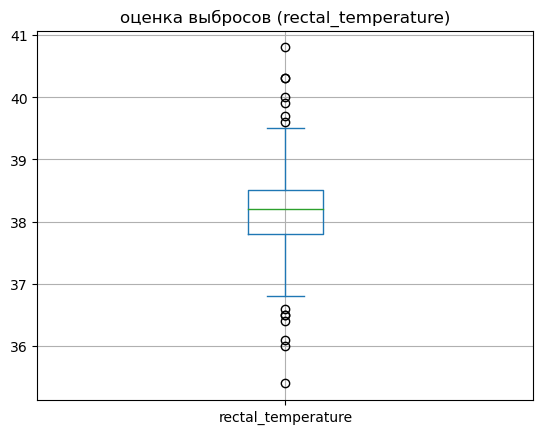

In [ ]:
df_horse["rectal_temperature"].plot(
    kind="box", title="оценка выбросов (rectal_temperature)", grid=True
)

### Оценка выбросов по столбцам surgery, age, temperature_extremities, pain, outcome, содержащих номинальные данные, не имеет физического смысла.

<div class="alert alert-block alert-info">

## **Задание 3**

### Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

### 3.1. Количество пропусков

In [ ]:
df_isna = pd.DataFrame()
col_new = df_horse.columns
for column in col_new:
    row = {
        "column": column,
        "null_count": df_horse[column].isna().count() - df_horse[column].count(),
        "null_ratio, %": (df_horse[column].isna().mean() * 100).round(2),
    }
    df_isna = pd.concat([df_isna, pd.DataFrame([row])])
df_isna.reset_index(drop=True)

,column,null_count,"null_ratio, %"
0,surgery,1,0.33
1,age,0,0.00
2,rectal_temperature,60,20.00
3,pulse,24,8.00
4,respiratory_rate,58,19.33
5,temperature_extremities,56,18.67
6,pain,55,18.33
7,outcome,1,0.33


### 3.2. Заполнение пропусков   
Заполнение пропусков данных различными способами, иногда без учёта физического смысла показателей

### Для наглядной оценки линейной взаимосвязи между показателями визуализируем корреляционную матрицу

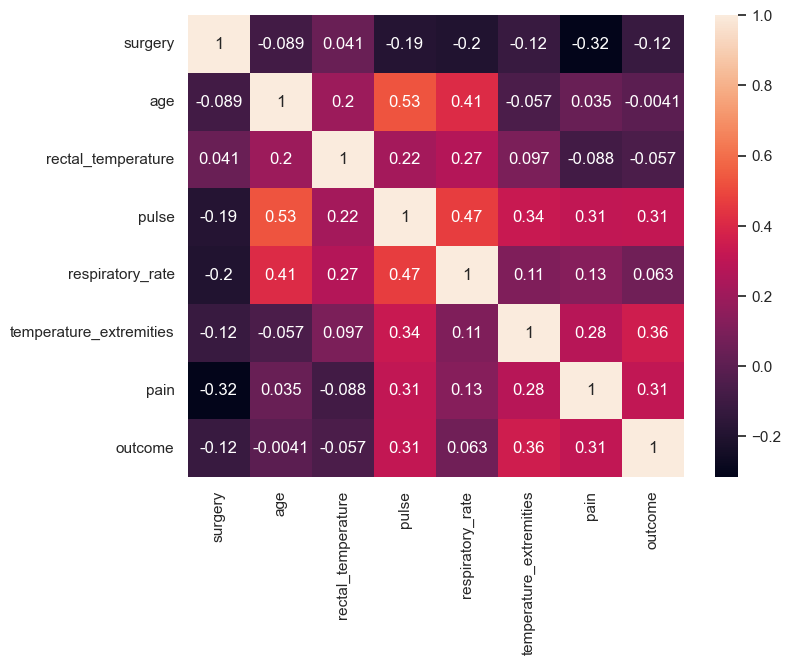

In [ ]:
# корреляционная матрица (которая впоследствие нигде не упоминается, хотя и использовалась)
cols = [
    "surgery",
    "age",
    "rectal_temperature",
    "pulse",
    "respiratory_rate",
    "temperature_extremities",
    "pain",
    "outcome",
]
sns.set(rc={"figure.figsize": (8, 6)})
hm = sns.heatmap(df_horse[cols].corr(), cbar=True, annot=True)

In [ ]:
df_happy_horse = df_horse.copy()

### 3.2.1. Создадим копию набора данных для заполнения пропусков

In [ ]:
df_happy_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery                  299 non-null    float64
 1   age                      300 non-null    int64  
 2   rectal_temperature       240 non-null    float64
 3   pulse                    276 non-null    float64
 4   respiratory_rate         242 non-null    float64
 5   temperature_extremities  244 non-null    float64
 6   pain                     245 non-null    float64
 7   outcome                  299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


### 3.2.2. В одном случае отсутствует информация о хирургическом вмешательстве (было или нет)

In [ ]:
df_happy_horse[df_happy_horse.surgery.isna()]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


#### Предположим, что показания к хирургическому вмешательству обычно сопроводжаются схожими симптомами - температурой, пульсом и частотой дыхания

In [ ]:
df_happy_horse[
    (df_happy_horse.rectal_temperature == 38)
    & (df_happy_horse.pulse == 48)
    & (df_happy_horse.respiratory_rate == 20)
]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN
155,2.0,1,38.0,48.0,20.0,3.0,1.0,1.0


#### В аналогичном случае хирургическое вмешательство не требовалось. Считаем, что в рассматриваемом случае его тоже не было

In [ ]:
df_happy_horse["surgery"] = df_happy_horse["surgery"].fillna(2)

### 3.2.3. Заполним данных о температруре значением средней температуры по больнице (понимаю, что чепуха какая-то, но ничего не поделаешь, это традиционная для температуры мера центральной тенденции)

In [ ]:
df_happy_horse["rectal_temperature"] = df_happy_horse["rectal_temperature"].fillna(
    df_happy_horse["rectal_temperature"].mean().round(2)
)

### 3.2.4. Записи, в которых пропущена практически вся значимая информация

In [ ]:
df_unknown_horse = df_happy_horse[
    (df_happy_horse.pulse.isna())
    & (df_happy_horse.respiratory_rate.isna())
    & (df_happy_horse.temperature_extremities.isna())
]
df_unknown_horse

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
28,1.0,1,38.17,NaN,NaN,NaN,NaN,2.0
56,1.0,1,38.17,NaN,NaN,NaN,NaN,1.0
74,1.0,9,38.17,NaN,NaN,NaN,NaN,2.0
160,1.0,1,38.17,NaN,NaN,NaN,4.0,1.0
175,1.0,1,38.17,NaN,NaN,NaN,NaN,1.0
207,1.0,1,38.17,NaN,NaN,NaN,NaN,2.0
216,2.0,1,38.17,NaN,NaN,NaN,NaN,1.0
227,1.0,9,38.17,NaN,NaN,NaN,NaN,1.0
288,1.0,1,38.17,NaN,NaN,NaN,NaN,1.0


#### Удалим их

In [ ]:
df_happy_horse = df_happy_horse.drop(
    df_happy_horse.index[list(df_unknown_horse.index)]
).reset_index(drop=True)

### 3.2.5. С единственным пропуском в столбце outcome поступим аналогично пропуску в столбце surgery

In [ ]:
df_happy_horse[df_happy_horse.outcome.isna()]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
126,2.0,1,38.0,48.0,20.0,3.0,4.0,NaN


#### Информацией о болевом синдроме вынужденно придётся пренебречь

In [ ]:
df_happy_horse[
    (df_happy_horse.rectal_temperature == 38)
    & (df_happy_horse.pulse == 48)
    & (df_happy_horse.respiratory_rate == 20)
    & (df_happy_horse.surgery == 2)
    & (df_happy_horse.age == 1)
]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
126,2.0,1,38.0,48.0,20.0,3.0,4.0,NaN
149,2.0,1,38.0,48.0,20.0,3.0,1.0,1.0


In [ ]:
df_happy_horse["outcome"] = df_happy_horse["outcome"].fillna(1)

### 3.2.6. Значения пульса, частоты дыхания, представленные непрерывными переменными, заполним средним значением, рассчитанным с группировкой по наличию хирургического вмешательства, возрастной группе и исходу лечения

In [ ]:
df_happy_horse["pulse"] = df_happy_horse["pulse"].fillna(
    df_happy_horse.groupby(["surgery", "age", "outcome"])["pulse"]
    .transform("mean")
    .round(0)
)
df_happy_horse["respiratory_rate"] = df_happy_horse["respiratory_rate"].fillna(
    df_happy_horse.groupby(["surgery", "age", "outcome"])["respiratory_rate"]
    .transform("mean")
    .round(0)
)

#### Тем не менее, одна запись осталась не обработана

In [ ]:
df_happy_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery                  291 non-null    float64
 1   age                      291 non-null    int64  
 2   rectal_temperature       291 non-null    float64
 3   pulse                    291 non-null    float64
 4   respiratory_rate         290 non-null    float64
 5   temperature_extremities  244 non-null    float64
 6   pain                     244 non-null    float64
 7   outcome                  291 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.3 KB


#### Не обработана запись для surgery==1, age==9, outcome==3. Что с ней не так?

In [ ]:
df_happy_horse.groupby(["surgery", "age", "outcome"])["respiratory_rate"].mean().round(
    0
)

surgery  age  outcome
1.0      1    1.0        30.0
              2.0        29.0
              3.0        35.0
         9    1.0        66.0
              2.0        55.0
              3.0         NaN
2.0      1    1.0        25.0
              2.0        29.0
              3.0        25.0
         9    1.0        44.0
              2.0        28.0
Name: respiratory_rate, dtype: float64

#### Эта запись единственная!

In [ ]:
df_happy_horse[
    (df_happy_horse.surgery == 1)
    & (df_happy_horse.age == 9)
    & (df_happy_horse.outcome == 3)
]

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
72,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0


#### Просто удалим её

In [ ]:
df_happy_horse = df_happy_horse.drop(df_happy_horse.index[72]).reset_index(drop=True)

### 3.2.7. Остались невыясненными сведения о болевом синдроме и температуре конечностей. Эти показатели описываются номинативными переменными, потому поступим аналогично случаю с пульсом и частотой дыхания, используя в качестве агрегатной функции медиану

In [ ]:
df_happy_horse["pain"] = df_happy_horse["pain"].fillna(
    df_happy_horse.groupby(["surgery", "age", "outcome"])["pain"].transform("median")
)
df_happy_horse["temperature_extremities"] = df_happy_horse[
    "temperature_extremities"
].fillna(
    df_happy_horse.groupby(["surgery", "age", "outcome"])[
        "temperature_extremities"
    ].transform("median")
)

### Результаты очистки данных

In [ ]:
df_happy_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery                  290 non-null    float64
 1   age                      290 non-null    int64  
 2   rectal_temperature       290 non-null    float64
 3   pulse                    290 non-null    float64
 4   respiratory_rate         290 non-null    float64
 5   temperature_extremities  290 non-null    float64
 6   pain                     290 non-null    float64
 7   outcome                  290 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.2 KB


In [ ]:
df_happy_horse.describe()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,1.410345,1.579310,38.163000,71.734483,30.151724,2.394828,2.993103,1.551724
std,0.492747,2.076959,0.659792,27.999293,16.182707,0.994000,1.245040,0.738755
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.825000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.170000,64.000000,28.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,35.750000,3.000000,4.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


#### Сравним результаты

In [ ]:
bs(df_horse)

,column,not_null,null_count,min,max,range,mode,mean,median,std,var,25%,75%,IQR
0,surgery,299,1,1.0,2.0,1.0,1.0,1.397993,1.0,0.490305,0.240399,1.0,2.0,1.0
1,age,300,0,1.0,9.0,8.0,1.0,1.640000,1.0,2.173972,4.726154,1.0,1.0,0.0
2,rectal_temperature,240,60,35.4,40.8,5.4,38.0,38.167917,38.2,0.732289,0.536247,37.8,38.5,0.7
3,pulse,276,24,30.0,184.0,154.0,48.0,71.913043,64.0,28.630557,819.708775,48.0,88.0,40.0
4,respiratory_rate,242,58,8.0,96.0,88.0,20.0,30.417355,24.5,17.642231,311.248328,18.5,36.0,17.5
5,temperature_extremities,244,56,1.0,4.0,3.0,3.0,2.348361,3.0,1.045054,1.092137,1.0,3.0,2.0
6,pain,245,55,1.0,5.0,4.0,3.0,2.951020,3.0,1.307940,1.710706,2.0,4.0,2.0
7,outcome,299,1,1.0,3.0,2.0,1.0,1.551839,1.0,0.737187,0.543445,1.0,2.0,1.0


In [ ]:
bs(df_happy_horse)

,column,not_null,null_count,min,max,range,mode,mean,median,std,var,25%,75%,IQR
0,surgery,290,0,1.0,2.0,1.0,1.00,1.410345,1.00,0.492747,0.242799,1.000,2.00,1.000
1,age,290,0,1.0,9.0,8.0,1.00,1.579310,1.00,2.076959,4.313757,1.000,1.00,0.000
2,rectal_temperature,290,0,35.4,40.8,5.4,38.17,38.163000,38.17,0.659792,0.435325,37.825,38.50,0.675
3,pulse,290,0,30.0,184.0,154.0,48.00,71.734483,64.00,27.999293,783.960399,48.000,88.00,40.000
4,respiratory_rate,290,0,8.0,96.0,88.0,30.00,30.151724,28.00,16.182707,261.880014,20.000,35.75,15.750
5,temperature_extremities,290,0,1.0,4.0,3.0,3.00,2.394828,3.00,0.994000,0.988035,1.000,3.00,2.000
6,pain,290,0,1.0,5.0,4.0,3.00,2.993103,3.00,1.245040,1.550125,2.000,4.00,2.000
7,outcome,290,0,1.0,3.0,2.0,1.00,1.551724,1.00,0.738755,0.545758,1.000,2.00,1.000


### Преобразуем данные в тот формат, в котором им надлежит быть по их природе

In [ ]:
df_happy_horse = df_happy_horse.astype(
    {
        "surgery": "int",
        "pulse": "int",
        "respiratory_rate": "int",
        "temperature_extremities": "int",
        "pain": "int",
        "outcome": "int",
    }
)

In [ ]:
df_happy_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery                  290 non-null    int64  
 1   age                      290 non-null    int64  
 2   rectal_temperature       290 non-null    float64
 3   pulse                    290 non-null    int64  
 4   respiratory_rate         290 non-null    int64  
 5   temperature_extremities  290 non-null    int64  
 6   pain                     290 non-null    int64  
 7   outcome                  290 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 18.2 KB


In [ ]:
df_happy_horse

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.20,88,20,3,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,3,4,2
...,...,...,...,...,...,...,...,...
285,1,1,38.17,120,70,4,2,3
286,2,1,37.20,72,24,3,4,3
287,1,1,37.50,72,30,4,4,2
288,1,1,36.50,100,24,3,3,1
